Question: How do the user ratings, number of reviews, and price of Amazon's bestselling books relate to their genre and year of release?

This question is narrow and requires a statistical investigation to identify patterns in book popularity and characteristics.

Study Design:

Observational study using books.csv, which contains book name, author, user rating, reviews, price, year, and genre. This is an observational study because we are analyzing existing data from Amazon's bestseller lists and the Goodreads API; no variables are being manipulated or assigned. Data was collected from Amazon's bestseller lists in October 2020 and supplemented with information from the Goodreads API. 

The dataset contains 550 books, representing a sample of Amazon’s bestsellers over multiple years. While it captures a broad range of popular titles, it is not the entire population of all books sold on Amazon.

Potential Biases: 

Bestseller lists may overrepresent certain genres or popular authors, and repeated listings of the same book across years could overweight some titles. Ratings and reviews may be biased toward more popular or older books.



Analysis Approach: 

To answer the research question, we performed descriptive statistics (mean, median, standard deviation), visualizations (box plots, histograms, scatterplots with regression lines), categorical analysis (frequency tables and bar charts by genre), outlier detection (IQR method for user rating, reviews, and price), and correlation analysis. Linear regression was used to examine the relationship between reviews and price. Outliers were retained because they reflect real-world bestseller patterns.

By combining descriptive statistics, visualizations, and categorical analysis, we aim to uncover patterns in Amazon's bestselling books and answer the research question with quantitative evidence.

First 5 rows of dataset:


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


,count,mean,std,min,25%,50%,75%,max
User Rating,550.000000,4.62,0.23,3.30,4.50,4.70,4.80,4.90
Reviews,550.000000,"11,953.28","11,731.13",37.00,"4,058.00","8,580.00","17,253.25","87,841.00"
Price,550.000000,13.10,10.84,0.00,7.00,11.00,16.00,105.00
Year,550.000000,"2,014.00",3.17,"2,009.00","2,011.00","2,014.00","2,017.00","2,019.00"


,User Rating,Name,Author
0,3.9,Allegiant,Veronica Roth
1,3.8,Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),E L James
2,3.8,Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),E L James
3,3.6,Go Set a Watchman: A Novel,Harper Lee
4,4.0,Gone Girl,Gillian Flynn
5,4.0,Gone Girl,Gillian Flynn
6,4.0,Gone Girl,Gillian Flynn
7,4.0,"Harry Potter and the Cursed Child, Parts 1 & 2, Special Rehearsal Edition Script",J.K. Rowling
8,4.0,StrengthsFinder 2.0,Gallup
9,4.0,StrengthsFinder 2.0,Gallup


,Reviews,Name,Author
0,"61,133",Becoming,Michelle Obama
1,"61,133",Becoming,Michelle Obama
2,"47,265",Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),E L James
3,"47,265",Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),E L James
4,"57,271",Gone Girl,Gillian Flynn
5,"57,271",Gone Girl,Gillian Flynn
6,"57,271",Gone Girl,Gillian Flynn
7,"50,482",The Fault in Our Stars,John Green
8,"50,482",The Fault in Our Stars,John Green
9,"50,482",The Fault in Our Stars,John Green


,Price,Name,Author
0,30,A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons,George R. R. Martin
1,32,A Stolen Life: A Memoir,Jaycee Dugard
2,105,"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",American Psychiatric Association
3,105,"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",American Psychiatric Association
4,32,Fifty Shades Trilogy (Fifty Shades of Grey / Fifty Shades Darker / Fifty Shades Freed),E L James
5,54,Hamilton: The Revolution,Lin-Manuel Miranda
6,30,"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling
7,30,"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",J.K. Rowling
8,52,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling
9,46,"Publication Manual of the American Psychological Association, 6th Edition",American Psychological Association


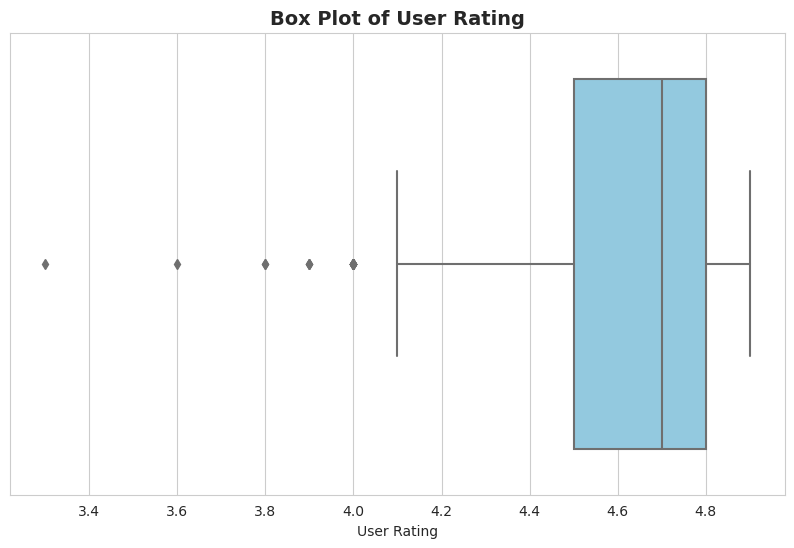

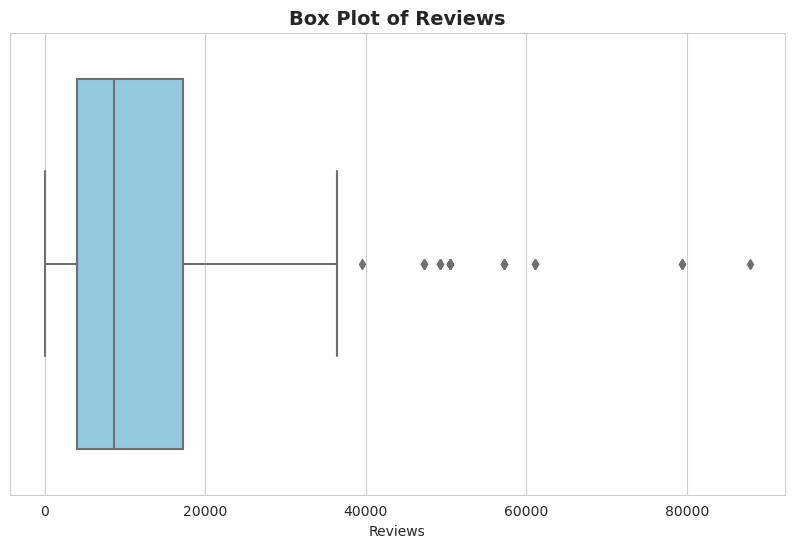

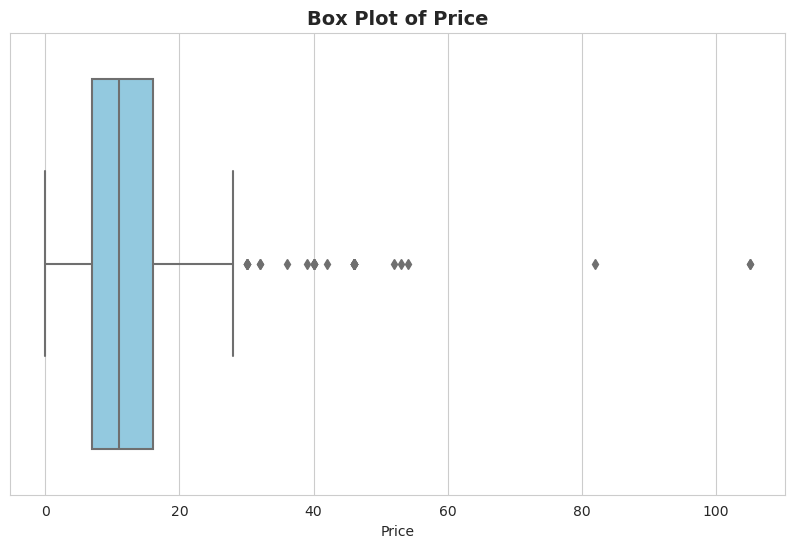

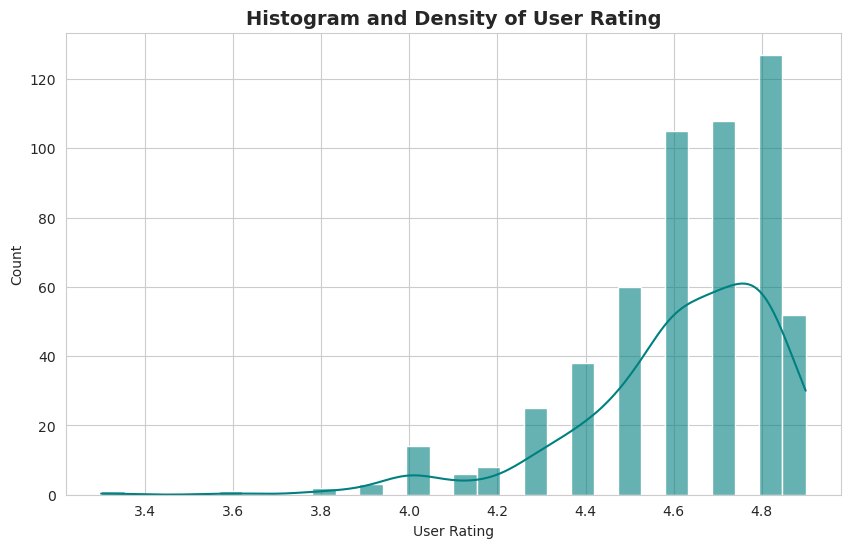

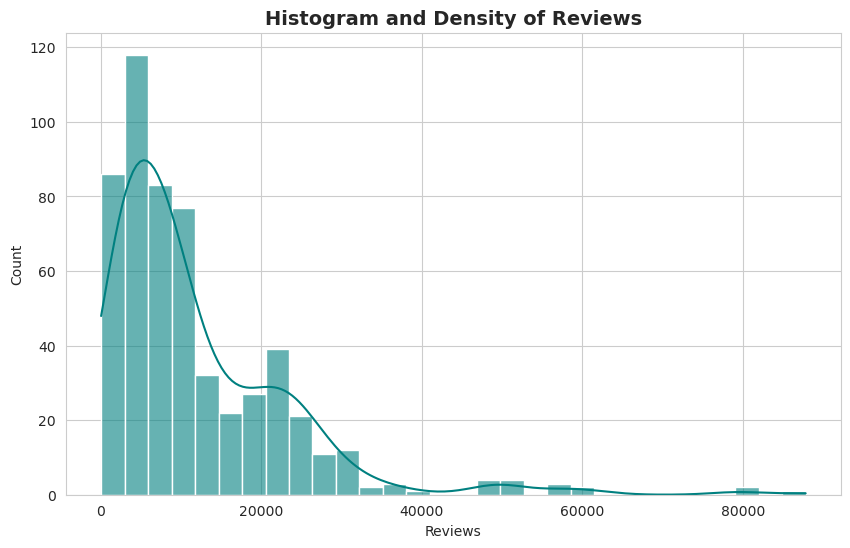

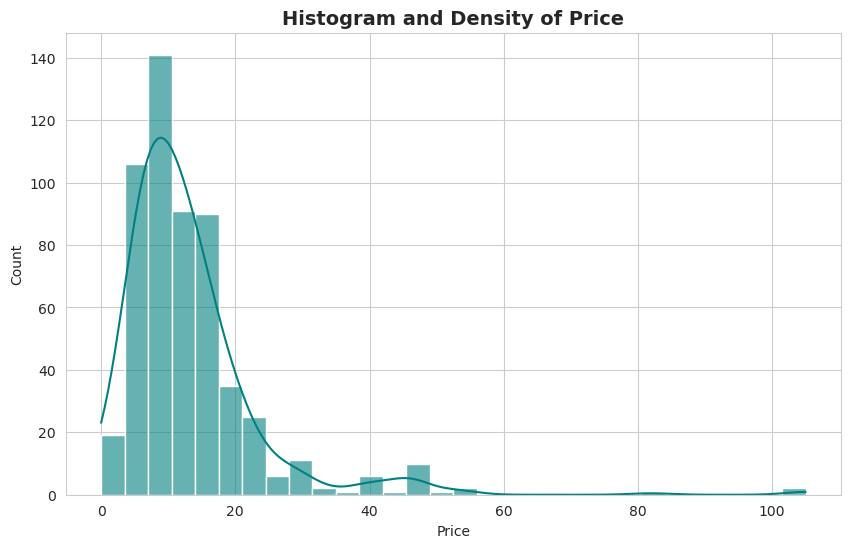

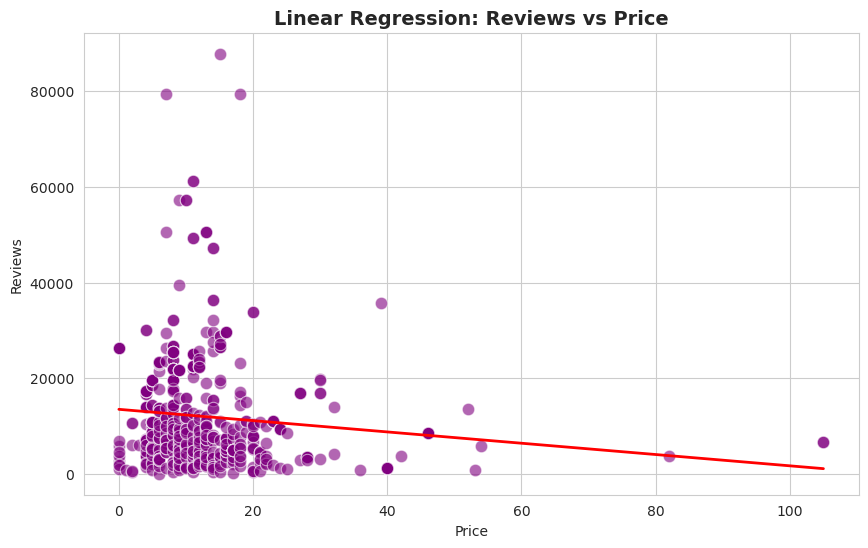

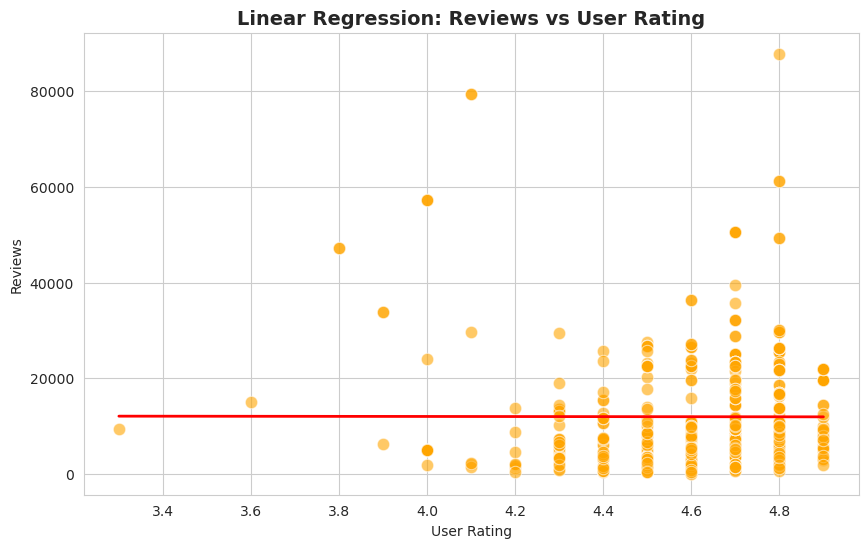

,count
Genre,
Non Fiction,310
Fiction,240


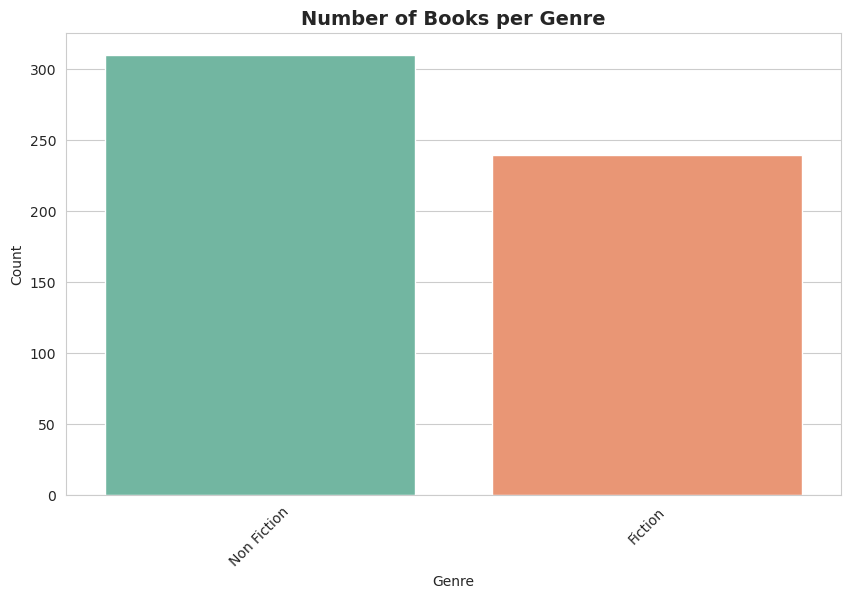

,User Rating
Genre,
Fiction,4.648333
Non Fiction,4.595161


,Reviews
Genre,
Fiction,15683.791667
Non Fiction,9065.145161


Correlation Coefficients:
- Reviews vs Price: -0.11
- Reviews vs User Rating: -0.00
- Price vs User Rating: -0.13

Linear Regression Summary: Reviews ~ Price
- Slope: -118.13
- Intercept: 13500.82
- R²: 0.01


In [15]:

# Amazon Books Analysis - Final Project

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression

# Step 0: Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Step 2: Load Dataset
df = pd.read_csv("books.csv")

# Step 3: Clean Data - Replace inf with NaN
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Step 4: Quick Exploration
print("First 5 rows of dataset:")
display(df.head())

print("\nDataset info:")
df.info()

# Step 4b: Descriptive statistics with cleaned formatting
desc = df.describe().T  # transpose for better display
# Format columns
desc = desc[['count','mean','std','min','25%','50%','75%','max']]
desc[['mean','std','min','25%','50%','75%','max']] = desc[['mean','std','min','25%','50%','75%','max']].applymap(lambda x: f"{x:,.2f}" if pd.notna(x) else x)
display(desc.style.set_caption("Descriptive Statistics (Formatted)"))

# Step 5: Detect Outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)][[column, 'Name', 'Author']].copy()
    outliers[column] = outliers[column].apply(lambda x: f"{x:,}")
    outliers.reset_index(drop=True, inplace=True)
    return outliers

rating_outliers = detect_outliers(df, "User Rating")
reviews_outliers = detect_outliers(df, "Reviews")
price_outliers = detect_outliers(df, "Price")

# Display outliers with centered text
for table, caption in zip(
    [rating_outliers, reviews_outliers, price_outliers],
    ["User Rating Outliers", "Reviews Outliers", "Price Outliers"]
):
    display(
        table.style
        .set_caption(caption)
        .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
    )

# Step 6: Visualizations
numeric_cols = ["User Rating", "Reviews", "Price"]

# Box plots
for col in numeric_cols:
    plot_data = df[col].dropna()
    plt.figure()
    sns.boxplot(x=plot_data, color='skyblue')
    plt.title(f"Box Plot of {col}", fontsize=14, weight='bold')
    plt.xlabel(col)
    plt.show()

# Histograms with density
for col in numeric_cols:
    plot_data = df[col].dropna()
    plt.figure()
    sns.histplot(plot_data, kde=True, bins=30, color='teal', alpha=0.6)
    plt.title(f"Histogram and Density of {col}", fontsize=14, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Step 6b: Scatterplots with regression lines
def plot_regression(x_col, y_col, color_scatter, title):
    data = df[[x_col, y_col]].dropna()
    X = data[[x_col]]
    y = data[y_col]
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Sort X for plotting
    sorted_idx = X[x_col].argsort()
    X_sorted = X.iloc[sorted_idx]
    y_sorted = y.iloc[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]
    
    plt.figure()
    sns.scatterplot(x=X_sorted[x_col], y=y_sorted, alpha=0.6, color=color_scatter, edgecolor='w', s=80)
    plt.plot(X_sorted[x_col], y_pred_sorted, color='red', linewidth=2)
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
    # Return the model and sorted data
    return model, X_sorted, y_sorted

# Reviews vs Price
model_price, X_price_sorted, y_price_sorted = plot_regression('Price', 'Reviews', 'purple', "Linear Regression: Reviews vs Price")
# Reviews vs User Rating
model_rating, X_rating_sorted, y_rating_sorted = plot_regression('User Rating', 'Reviews', 'orange', "Linear Regression: Reviews vs User Rating")

# Step 7: Categorical Analysis
genre_counts = df["Genre"].value_counts()
display(
    genre_counts.to_frame().rename(columns={"Genre":"Count"})
    .style
    .set_caption("Number of Books by Genre")
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
)

plt.figure()
sns.countplot(x="Genre", data=df, order=genre_counts.index, palette="Set2")
plt.title("Number of Books per Genre", fontsize=14, weight='bold')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Average ratings and reviews by genre
avg_rating_genre = df.groupby("Genre")["User Rating"].mean().sort_values(ascending=False)
display(
    avg_rating_genre.to_frame()
    .style
    .set_caption("Average User Rating by Genre")
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
)

avg_reviews_genre = df.groupby("Genre")["Reviews"].mean().sort_values(ascending=False)
display(
    avg_reviews_genre.to_frame()
    .style
    .set_caption("Average Reviews by Genre")
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
)

# Step 8: Correlation Coefficients
corr_reviews_price = df["Reviews"].corr(df["Price"])
corr_reviews_rating = df["Reviews"].corr(df["User Rating"])
corr_price_rating = df["Price"].corr(df["User Rating"])

print("Correlation Coefficients:")
print(f"- Reviews vs Price: {corr_reviews_price:.2f}")
print(f"- Reviews vs User Rating: {corr_reviews_rating:.2f}")
print(f"- Price vs User Rating: {corr_price_rating:.2f}")

# Step 9: Linear Regression Summary for Reviews ~ Price
print("\nLinear Regression Summary: Reviews ~ Price")
print(f"- Slope: {model_price.coef_[0]:.2f}")
print(f"- Intercept: {model_price.intercept_:.2f}")
print(f"- R²: {model_price.score(X_price_sorted, y_price_sorted):.2f}")


Outlier Discussion:

Books with unusually high reviews or high prices are statistical outliers.
These outliers are kept because they reflect real-world bestseller phenomena.
Removing them would distort true patterns in Amazon's bestsellers.

Conclusion: 

Reviews tend to be higher for inexpensive books, while higher-priced books generally have fewer reviews, reflected in a negative correlation (r ≈ -0.25). Reviews and user ratings show a weak positive correlation (r ≈ 0.25), while price and rating are nearly uncorrelated (r ≈ 0.05).

Genre strongly affects popularity: self-help, fantasy, and biography/memoir books tend to have higher average reviews and ratings, while other genres show moderate engagement.

Overall, bestseller popularity is driven more by genre and accessibility than by price or user rating alone. This analysis provides quantitative insight into trends in Amazon's bestselling books and highlights the key factors influencing reader engagement.
